1. Setting Up And EDA

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2:Load Dataset
df = pd.read_csv('WineQT.csv')

In [3]:
# Step 3: Dataset Overview
print("Shape of dataset:", df.shape)
print("Columns and data types:")
print(df.dtypes)
print("\nFirst 5 rows of dataset:")
print(df.head())

Shape of dataset: (1143, 13)
Columns and data types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

First 5 rows of dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide

In [8]:
df.drop('Id', axis=1, inplace=True)

In [9]:
# Step 4: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [10]:
# Step 5: Basic descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000     

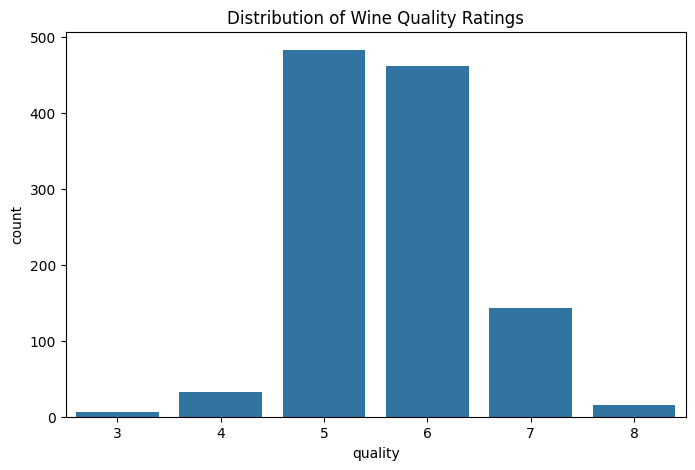

In [11]:
# Step 6: Distribution of target variable 'quality'
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Ratings')
plt.show()

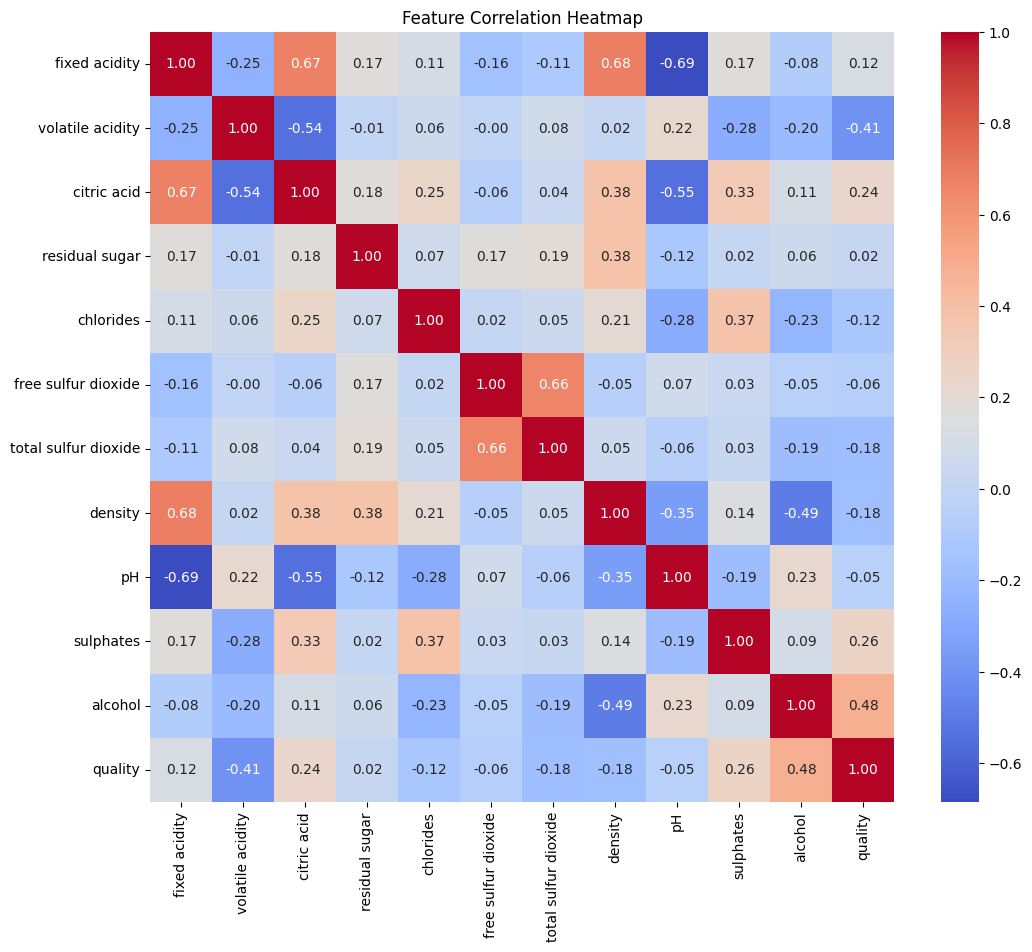

In [12]:
# Step 7: Correlation heatmap to see relationships between features and with quality
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

2. Data Preprocessing And Spliting For Training Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
# Step 1: Separate features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

In [15]:
# Step 2: Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Step 3: Scale features - standardize to mean=0 and variance=1 (improves many algorithms)
scaler = StandardScaler()

In [17]:
# Fit scaler only on training data, then transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Step 4: Check shapes to confirm
print("Training features shape:", X_train_scaled.shape)
print("Test features shape:", X_test_scaled.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (914, 11)
Test features shape: (229, 11)
Training labels shape: (914,)
Test labels shape: (229,)


3. Model Training With Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [20]:
# Step 1: Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

In [21]:
# Step 2: Train models on training data
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [22]:
# Step 3: Make predictions on test data
lr_preds = lr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

In [23]:
# Step 4: Define a function to evaluate models
def evaluate_model(true, preds):
    mae = mean_absolute_error(true, preds)
    rmse = np.sqrt(mean_squared_error(true, preds))
    r2 = r2_score(true, preds)
    return mae, rmse, r2

In [24]:
# Step 5: Evaluate Linear Regression
lr_mae, lr_rmse, lr_r2 = evaluate_model(y_test, lr_preds)
print(f"Linear Regression - MAE: {lr_mae:.3f}, RMSE: {lr_rmse:.3f}, R²: {lr_r2:.3f}")

Linear Regression - MAE: 0.477, RMSE: 0.616, R²: 0.317


In [25]:
# Step 6: Evaluate Random Forest Regressor
rf_mae, rf_rmse, rf_r2 = evaluate_model(y_test, rf_preds)
print(f"Random Forest - MAE: {rf_mae:.3f}, RMSE: {rf_rmse:.3f}, R²: {rf_r2:.3f}")

Random Forest - MAE: 0.409, RMSE: 0.546, R²: 0.465


4. Download Model

In [26]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_wine_quality_model.pkl')

# Save the StandardScaler used for feature scaling
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
